## **1. Dataset**

MARKDOWN

For this project, I chose to work with the Chicago Traffic Crashes dataset from the City of Chicago’s open data portal. I picked this dataset because I’ve had a personal experience with a near-accident, which made me more curious about when and where crashes tend to happen. It felt meaningful to dig into real-world crash data and understand patterns that could help explain why accidents occur so often in certain areas or under specific conditions.

I found this dataset by searching through the Chicago Data Portal, filtering for transportation-related data with recent updates and full public access.

In [ ]:
import pandas as pd
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Load the CSV (adjust path if it's in a subfolder)
df = pd.read_csv('/content/drive/My Drive/DSD Capstone Project/Traffic_Crashes.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. **Exploratory Data Analysis:**

MARKDOWN

For an exploratory data analysis, I mainly analyzed the posted speed limits, traffic control devices, trafficway type, street names, circumstances surrounding the crash including weather, crash causes and types, damage, injuries, and time of crash.

My findings:

SETTING
- Most crashes occured where there's no traffic control (around 546k), a traffic signal (around 260k), and stop sign/flasher (around 96k)
- Common road types for crashes: Not divided > Median-separated > One-way.
- Most crashes on major streets like WESTERN AVE, PULASKI RD, CICERO AVE, ASHLAND AVE, HALSTED ST, KEDZIE AVE, MICHIGAN AVE, NORTH AVE, STATE ST, CLARK ST
- Streets with highest average injuries: DAN RYAN XPRS IB & LOWER HUBBARD ST (1.5 avg injuries each).

CONDITIONS
- Most crashes occured in daylight & dry conditions.
- More injuries occur in fog, snow, and rain (fog has the highest avg injury per crash: around 0.26).
- Most crashes didn’t involve road defects (but ruts/holes came up next).

CRASH DETAILS
- Top crash types: Parked vehicle, rear-end, sideswipe.
- Crashes with highest average injuries: Pedestrian-related, overturns, head-on.
- Most damage ($1,500+): Parked vehicles, rear-ends, turns.
- Range of number of injuries in all crashes ranged from 0-21. With a mean around 1.5

CAUSES
- Top primary causes: failure to yield, following too closely, improper overtaking
- Causes linked to high injury averages: Disregarding signals, driver physical condition, and ignoring signs.
- Traffic controls linked to most injuries: Bike + pedestrian crossings, flashing signals.

TIMING
- Peak crash times: 3–5pm (commute hours).
- Least crash activity: Early AM (1–5am).
- Crash days are fairly even, but Friday + Saturday take the lead.






In [ ]:
#column names
df.columns

#ones to analyze: 'POSTED_SPEED_LIMIT',
#'TRAFFIC_CONTROL_DEVICE', 'TRAFFICWAY_TYPE', STREET_NAME ------------ SETTING DETAILS
#'LIGHTING_CONDITION', 'WEATHER_CONDITION', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT' ----------- THE CIRCUMSTANCES SURROUNDING CRASH
#'FIRST_CRASH_TYPE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE' --------- CRASH DEETS
#DAMAGE, INJURIES_TOTAL ---- AFTERMATH
#CRASH_HOUR', 'CRASH_DAY_OF_WEEK ------ TIME

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [ ]:
#speed limit mean, most common speed limits w value counts
df["POSTED_SPEED_LIMIT"].mean() #28.42 MPH
speed_lim = df["POSTED_SPEED_LIMIT"].value_counts() #make a graph later

In [ ]:
#SETTING DETAILS: 'TRAFFIC_CONTROL_DEVICE', 'TRAFFICWAY_TYPE', STREET_NAME
traf_cont = df["TRAFFIC_CONTROL_DEVICE"].value_counts() #most common: NO CONTROLS	546613, TRAFFIC SIGNAL	268308, STOP SIGN/FLASHER	96084
traf_type = df["TRAFFICWAY_TYPE"].value_counts() #most common: NOT DIVIDED	415034, DIVIDED - W/MEDIAN (NOT RAISED)	151718, ONE-WAY	121922
df_st = df["STREET_NAME"].value_counts()
df_st.head(10)  #most common crash sites: WESTERN AVE	26516, PULASKI RD	23312, CICERO AVE	21752, ASHLAND AVE	21066, HALSTED ST	18711, KEDZIE AVE	16945, MICHIGAN AVE	12412, NORTH AVE	11175, STATE ST	10913, CLARK ST	10388

#streets with highest average injuries
inj_st = df[["STREET_NAME", "INJURIES_TOTAL"]].copy()
i = inj_st.groupby("STREET_NAME").agg("mean", numeric_only = True).reset_index()
i.nlargest(10, "INJURIES_TOTAL")

#highest avg injuries 546	DAN RYAN XPRS IB	1.500000,	LOWER HUBBARD ST	1.500000,	DAN RYAN LOCAL IB	1.166667,	130TH ST S	1.000000,	71S ST	1.000000,	BOWLING GREEN DR	1.000000,	BROADWAY ST	1.000000,	COMMONS DR	1.000000,	FARRAGUT DR	1.000000,	FRANKLIN ST XR	1.000000

,STREET_NAME,INJURIES_TOTAL
546,DAN RYAN XPRS IB,1.500000
1054,LOWER HUBBARD ST,1.500000
544,DAN RYAN LOCAL IB,1.166667
64,130TH ST S,1.000000
205,71S ST,1.000000
388,BOWLING GREEN DR,1.000000
401,BROADWAY ST,1.000000
503,COMMONS DR,1.000000
663,FARRAGUT DR,1.000000
694,FRANKLIN ST XR,1.000000


In [ ]:
#LIGHTING_CONDITION', 'WEATHER_CONDITION', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT' ----------- THE CIRCUMSTANCES SURROUNDING CRASH
df_lightcond = df["LIGHTING_CONDITION"].value_counts() #mostly daylight, darkness/lighted road
df_weathercond = df["WEATHER_CONDITION"].value_counts() #clear, rain, snow
df_roadcond = df["ROADWAY_SURFACE_COND"].value_counts() #mostly dry, wet, snow/slush
df_roaddef = df["ROAD_DEFECT"].value_counts() #majority of crashes didn't include a road defect, rut/holes were 3rd common after "unknown"

#injuries based on weather
inj_weath = df[["WEATHER_CONDITION", "INJURIES_TOTAL"]].copy()
l = inj_weath.groupby("WEATHER_CONDITION").agg("mean", numeric_only = True).reset_index()
l.nlargest(10, "INJURIES_TOTAL")

#most injuries in FOG/SMOKE/HAZE	0.259181, BLOWING SNOW	0.253608, RAIN	0.240504

,WEATHER_CONDITION,INJURIES_TOTAL
4,FOG/SMOKE/HAZE,0.259181
1,BLOWING SNOW,0.253608
6,OTHER,0.252690
7,RAIN,0.240504
5,FREEZING RAIN/DRIZZLE,0.232688
9,SLEET/HAIL,0.231532
3,CLOUDY/OVERCAST,0.211250
2,CLEAR,0.201384
0,"BLOWING SAND, SOIL, DIRT",0.200000
8,SEVERE CROSS WIND GATE,0.198582


In [ ]:
##'FIRST_CRASH_TYPE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE' --------- CRASH DEETS
df_crash = df["FIRST_CRASH_TYPE"].value_counts() #most common: PARKED MOTOR VEHICLE	223878, REAR END	212352, SIDESWIPE SAME DIRECTION	149772, TURNING	139861, ANGLE	105308
df_primcause = df["PRIM_CONTRIBUTORY_CAUSE"].value_counts() #unable to determine 380238, FAILING TO YIELD RIGHT-OF-WAY	107531, FOLLOWING TOO CLOSELY	92931,
df_seccause = df["SEC_CONTRIBUTORY_CAUSE"].value_counts() #FAILING TO REDUCE SPEED TO AVOID CRASH	35237, FAILING TO YIELD RIGHT-OF-WAY	31456, DRIVING SKILLS/KNOWLEDGE/EXPERIENCE	30455

#crash v injury
crash_inj = df[["FIRST_CRASH_TYPE", "INJURIES_TOTAL"]].copy()
crash_inj.groupby("FIRST_CRASH_TYPE").agg("mean", numeric_only = True).reset_index().nlargest(5, "INJURIES_TOTAL")
#greatest avg injury in pedestrian, pedalcyclist, overturned, train, head on

#crash v damage
crash_dam = df[["FIRST_CRASH_TYPE", "DAMAGE"]]
crash_dam[crash_dam.DAMAGE == "OVER $1,500"].value_counts()
#most damage in PARKED MOTOR VEHICLE	OVER $1,500	140078, REAR END	OVER $1,500	126410, TURNING	OVER $1,500	100543, SIDESWIPE SAME DIRECTION	OVER $1,500	88280, ANGLE	OVER $1,500	80995

,,count
FIRST_CRASH_TYPE,DAMAGE,
PARKED MOTOR VEHICLE,"OVER $1,500",140078
REAR END,"OVER $1,500",126410
TURNING,"OVER $1,500",100543
SIDESWIPE SAME DIRECTION,"OVER $1,500",88280
ANGLE,"OVER $1,500",80995
FIXED OBJECT,"OVER $1,500",34193
SIDESWIPE OPPOSITE DIRECTION,"OVER $1,500",8077
PEDESTRIAN,"OVER $1,500",7677
HEAD ON,"OVER $1,500",6376


In [ ]:
#DAMAGE, INJURIES_TOTAL ---- AFTERMATH

df["INJURIES_TOTAL"].nlargest(10)
#Highest # of injuries: four crashes w 21 injuries, two with 19, 17, 2 with 16

#prime cause v injury
cause_inj = df[["PRIM_CONTRIBUTORY_CAUSE", "INJURIES_TOTAL"]].copy()
cause_inj.groupby("PRIM_CONTRIBUTORY_CAUSE").agg("mean", numeric_only = True).reset_index().nlargest(5, "INJURIES_TOTAL")
#greatest injury total avg in: DISREGARDING TRAFFIC SIGNALS	0.693753, PHYSICAL CONDITION OF DRIVER	0.547143, DISREGARDING OTHER TRAFFIC SIGNS	0.528487, MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT	0.520000, DISREGARDING YIELD SIGN	0.516892

#traffic control v injury
trafcont_inj = df[["TRAFFIC_CONTROL_DEVICE", "INJURIES_TOTAL"]].copy()
trafcont_inj.groupby("TRAFFIC_CONTROL_DEVICE").agg("mean", numeric_only = True).reset_index().nlargest(5, "INJURIES_TOTAL")
#greatest injury total avg in: BICYCLE CROSSING SIGN	0.684211, PEDESTRIAN CROSSING SIGN	0.600269, FLASHING CONTROL SIGNAL	0.409953, SCHOOL ZONE	0.341085, YIELD	0.337139

df["DAMAGE"].value_counts()
#OVER $1,500	616576, $501 - $1,500	245022, $500 OR LESS	107111

e = df[["POSTED_SPEED_LIMIT", "DAMAGE"]]
e[e["DAMAGE"] == "OVER $1,500"].value_counts()
#most damage happened under posted speed limits 30, 35, 25


f = df[["TRAFFICWAY_TYPE", "DAMAGE"]]
f[f["DAMAGE"] == "OVER $1,500"].value_counts()
#most damage under not divided, divided w/median, one-way, four way

,,count
TRAFFICWAY_TYPE,DAMAGE,
NOT DIVIDED,"OVER $1,500",259250
DIVIDED - W/MEDIAN (NOT RAISED),"OVER $1,500",97048
ONE-WAY,"OVER $1,500",76396
FOUR WAY,"OVER $1,500",53979
DIVIDED - W/MEDIAN BARRIER,"OVER $1,500",37492
PARKING LOT,"OVER $1,500",33960
OTHER,"OVER $1,500",16257
T-INTERSECTION,"OVER $1,500",10471
ALLEY,"OVER $1,500",9479


In [ ]:
#CRASH_HOUR', 'CRASH_DAY_OF_WEEK ------ TIME

#find peak crash hours and days
df["CRASH_HOUR"].value_counts() #most common around 3pm, 4pm, 5pm, 2pm, 6pm, least common: 1 am, 2 am, 5 am, 3 am, 4 am
df["CRASH_DAY_OF_WEEK"].value_counts() #evenly distributed honestly; most crashes on fridays and saturdays

#prime cause based on hours and days #GRAPH

,count
CRASH_DAY_OF_WEEK,
6,157252
7,142812
5,139969
3,137870
4,137383
2,132622
1,120801


# 3. **Exploratory Data Visualization:**

MARKDOWN

In the exploratory data visualization section, I was able to view my findings from my exploratory data analysis in clear and graphical way. I utilized bar graphs for this section. I noticed that 6 streets(Western Avenue, Pulalski Road, Cicero Avenue, Ashland Avenue, Halsted Street, Kedzie Avenue) had the highest number of crashes; the rest of the streets had similar numbers in terms of crashes.
For Trafficway Type Distribution, it was clearly seen that a not divided traffic type or divided w/ median traffic type had the most crashes.
In another visualization, I was able to view that most crashes occured in daylight and clear weather conditions.
It was also noted that regarding traffic control, no controls, a traffic signal, and a stop sign/flasher led to the most crashes.
Russel Dr, Franklin Blvd, and Vermont St had the highest injuries and they all had 50+ crashes.
The highest average of injuries in a crash was seen fog/smoke/haze and blowing snow conditions.
Most common crash types included a parked vehicle, rearend, and sideswipe same direction. Most crashes had a cause that was "unable to determine", but failing to yield the right of way or following too closely had high numbers of crashes.
It was observed that most crashes occured in the afternoon, usually on Fridays or Saturdays.

<Axes: title={'center': 'Top 50 Street Names with the most crashes'}, xlabel='Street Names', ylabel='Number of Crashes'>

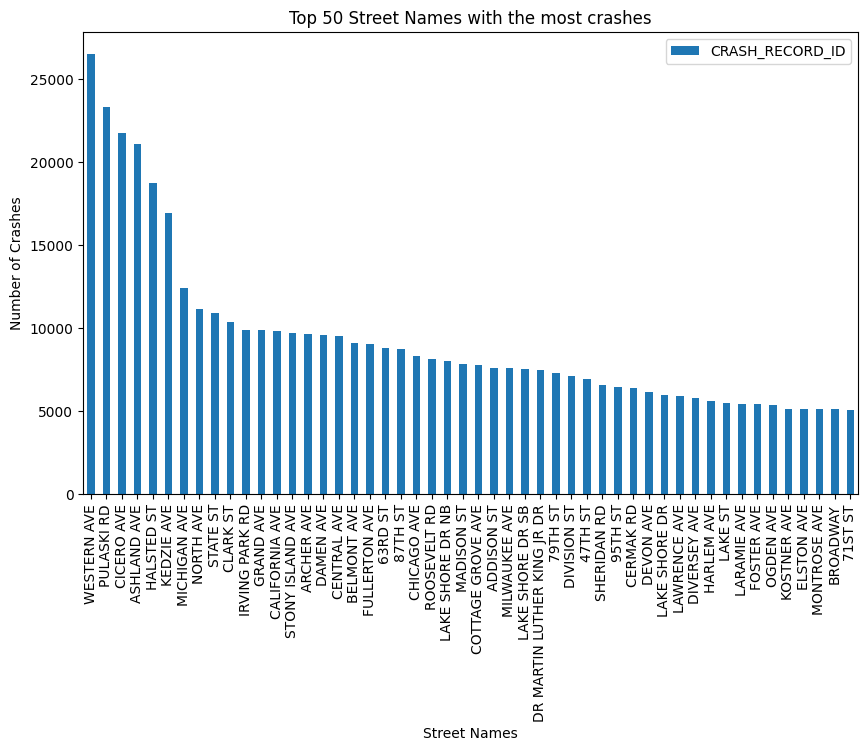

In [ ]:
#bar chart: top 50 street names with the most crashes
strcrash = df.groupby("STREET_NAME").agg("count").reset_index().nlargest(50, "CRASH_RECORD_ID")
strcrash.plot.bar(x = "STREET_NAME", y = "CRASH_RECORD_ID", xlabel = "Street Names", ylabel = "Number of Crashes", figsize=(10, 6), title = "Top 50 Street Names with the most crashes")

<Axes: title={'center': 'Trafficway Type Distribution'}, xlabel='Traffic Way Type', ylabel='Number of Crashes'>

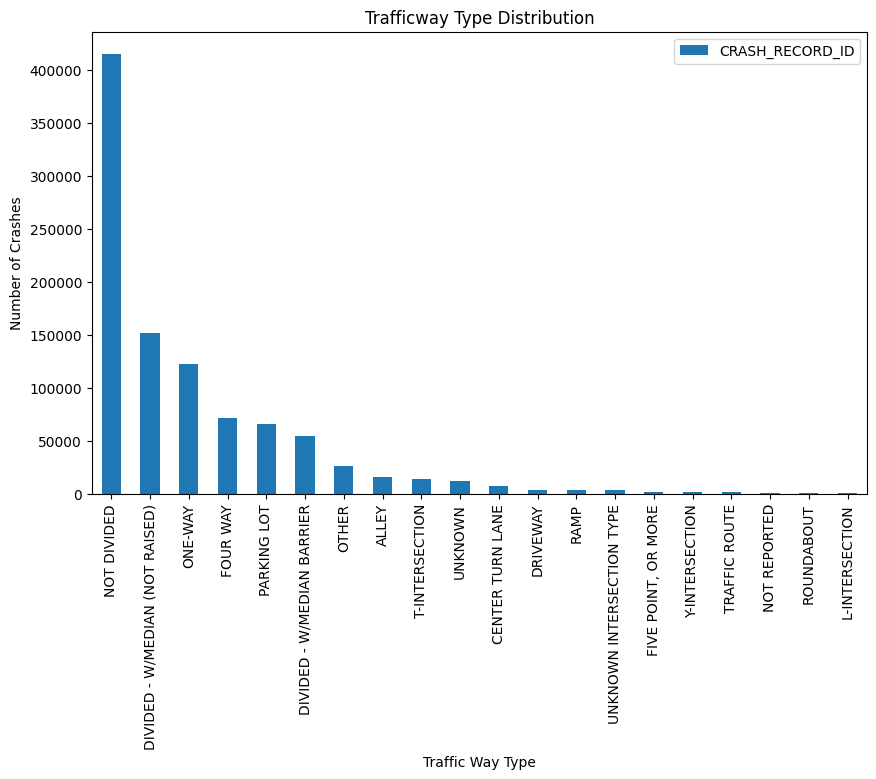

In [ ]:
#bar chart: trafficway type distribution
trafcrash = df.groupby("TRAFFICWAY_TYPE").agg("count").reset_index().nlargest(50, "CRASH_RECORD_ID")
trafcrash.plot.bar(x = "TRAFFICWAY_TYPE", y = "CRASH_RECORD_ID", xlabel = "Traffic Way Type", ylabel = "Number of Crashes", figsize=(10, 6), title = "Trafficway Type Distribution")

<Axes: title={'center': 'Weather vs Lighting Conditions During Crashes'}, xlabel='Weather Condition', ylabel='Number of Crashes'>

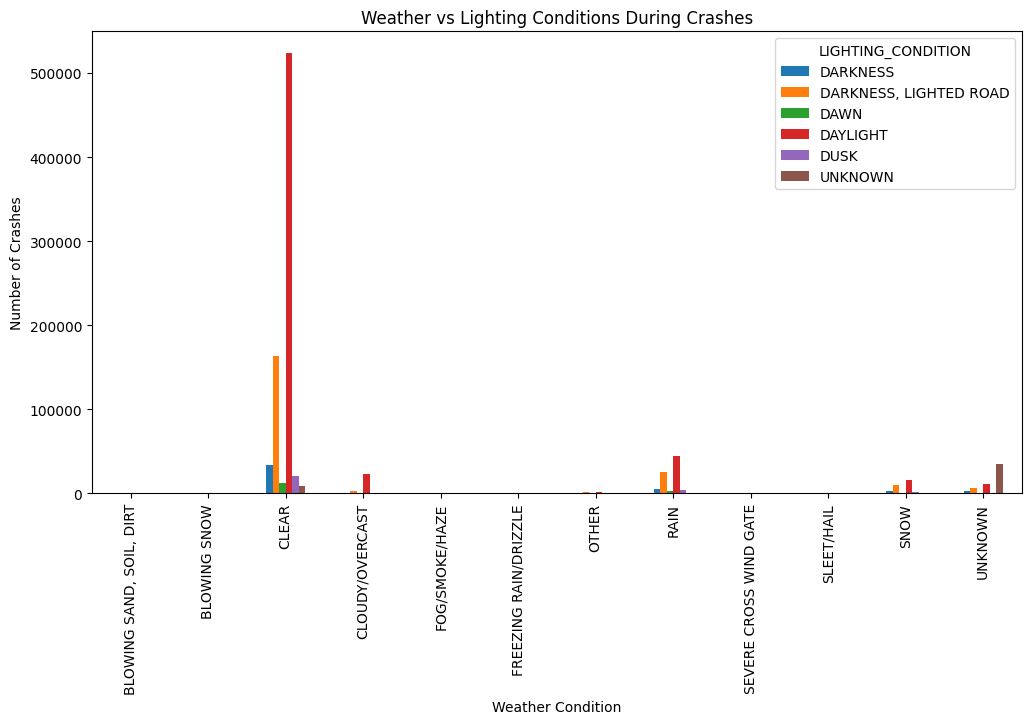

In [ ]:
#stacked bar chart or grouped bar: compare weather conditions vs lighting conditions during crashes
# get counts
plot_data = df.groupby(['WEATHER_CONDITION', 'LIGHTING_CONDITION']).size().unstack(fill_value=0)

# 2. Use pandas' built-in .plot.bar() method to generate the grouped bar chart
# The 'ax' variable will hold the matplotlib Axes object, allowing further customization.
plot_data.plot.bar(figsize=(12, 6), title='Weather vs Lighting Conditions During Crashes', xlabel='Weather Condition', ylabel='Number of Crashes')

<Axes: title={'center': 'Top Traffic Control Device Types in Crashes'}, xlabel='Traffic Control Device', ylabel='Number of Crashes'>

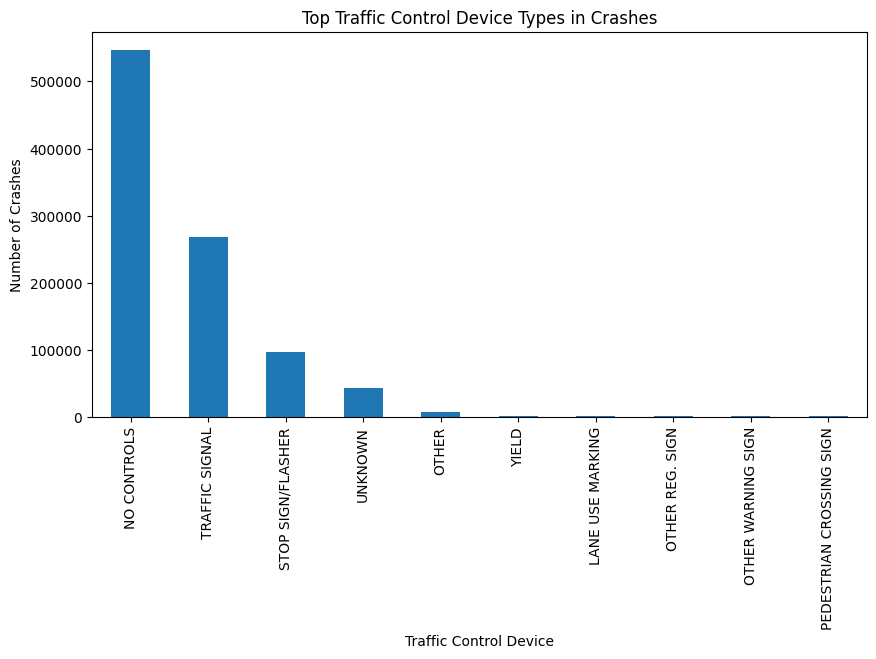

In [ ]:
# most crashes by traffic control type
df['TRAFFIC_CONTROL_DEVICE'].value_counts().head(10).plot.bar(figsize=(10, 5), xlabel='Traffic Control Device', ylabel='Number of Crashes', title='Top Traffic Control Device Types in Crashes')

<Axes: title={'center': 'Streets with Highest Avg Injuries (50+ crashes)'}, xlabel='Street Name', ylabel='Avg Injuries per Crash'>

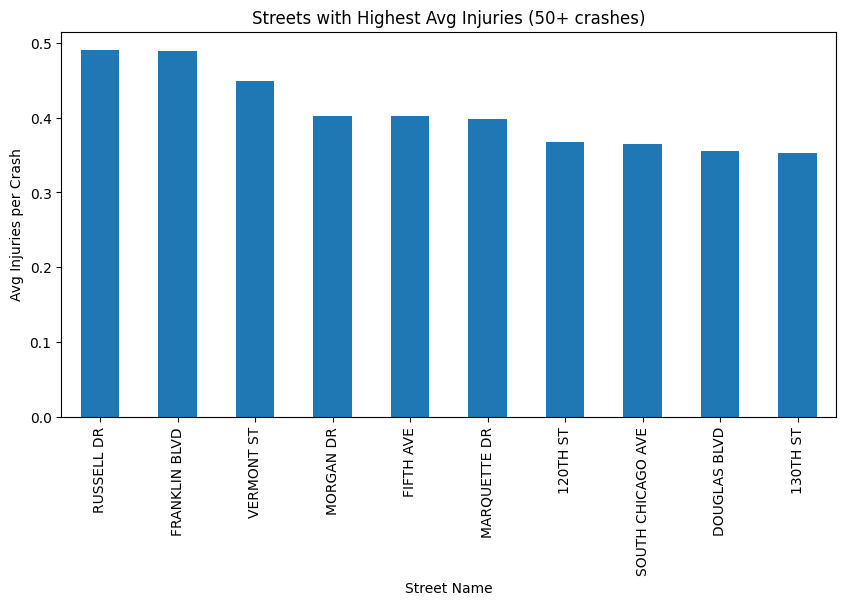

In [ ]:
# streets with highest avg injuries (filtering to streets with 50+ crashes to avoid outliers)
street_injury_avg = df.groupby('STREET_NAME')['INJURIES_TOTAL'].mean()
street_counts = df['STREET_NAME'].value_counts()
filtered = street_injury_avg[street_counts > 50].sort_values(ascending=False).head(10)
filtered.plot.bar(figsize=(10, 5), xlabel='Street Name', ylabel='Avg Injuries per Crash', title='Streets with Highest Avg Injuries (50+ crashes)')

<Axes: title={'center': 'Avg Injuries per Crash by Weather Condition'}, xlabel='Weather Condition', ylabel='Avg Injuries per Crash'>

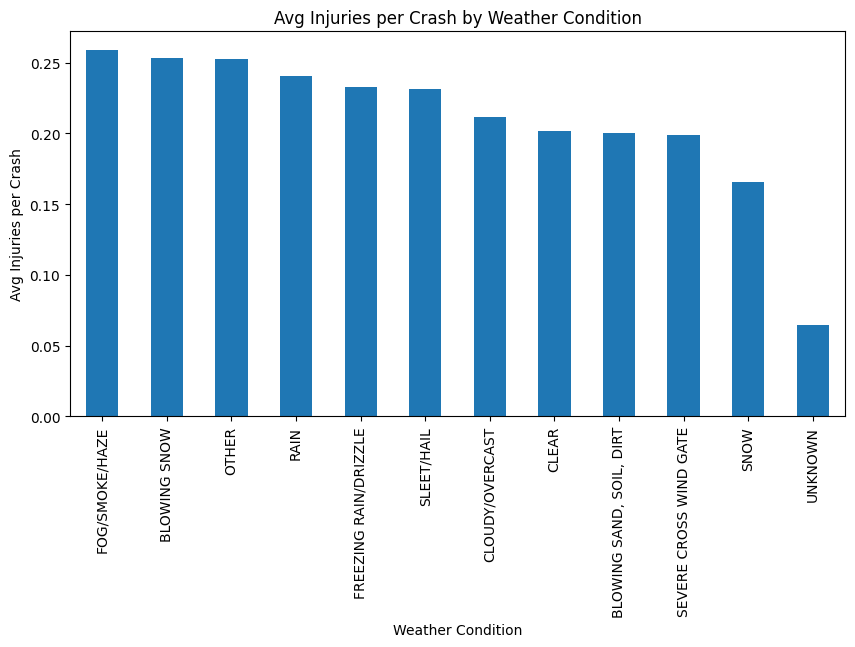

In [ ]:
# weather vs avg injuries
df.groupby('WEATHER_CONDITION')['INJURIES_TOTAL'].mean().sort_values(ascending=False).plot.bar(figsize=(10, 5), xlabel='Weather Condition', ylabel='Avg Injuries per Crash', title='Avg Injuries per Crash by Weather Condition')

<Axes: title={'center': 'Top 15 First Crash Types'}, xlabel='Crash Type', ylabel='Number of Crashes'>

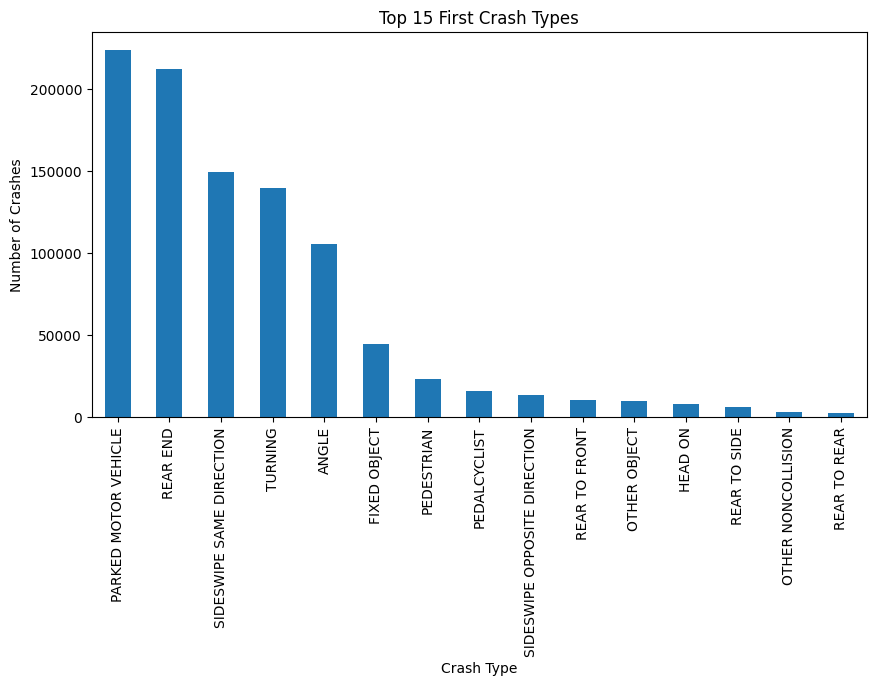

In [ ]:
# top crash types
df['FIRST_CRASH_TYPE'].value_counts().head(15).plot.bar(figsize=(10, 5), xlabel='Crash Type', ylabel='Number of Crashes', title='Top 15 First Crash Types')

<Axes: title={'center': 'Top 15 Primary Contributory Causes'}, xlabel='Cause', ylabel='Number of Crashes'>

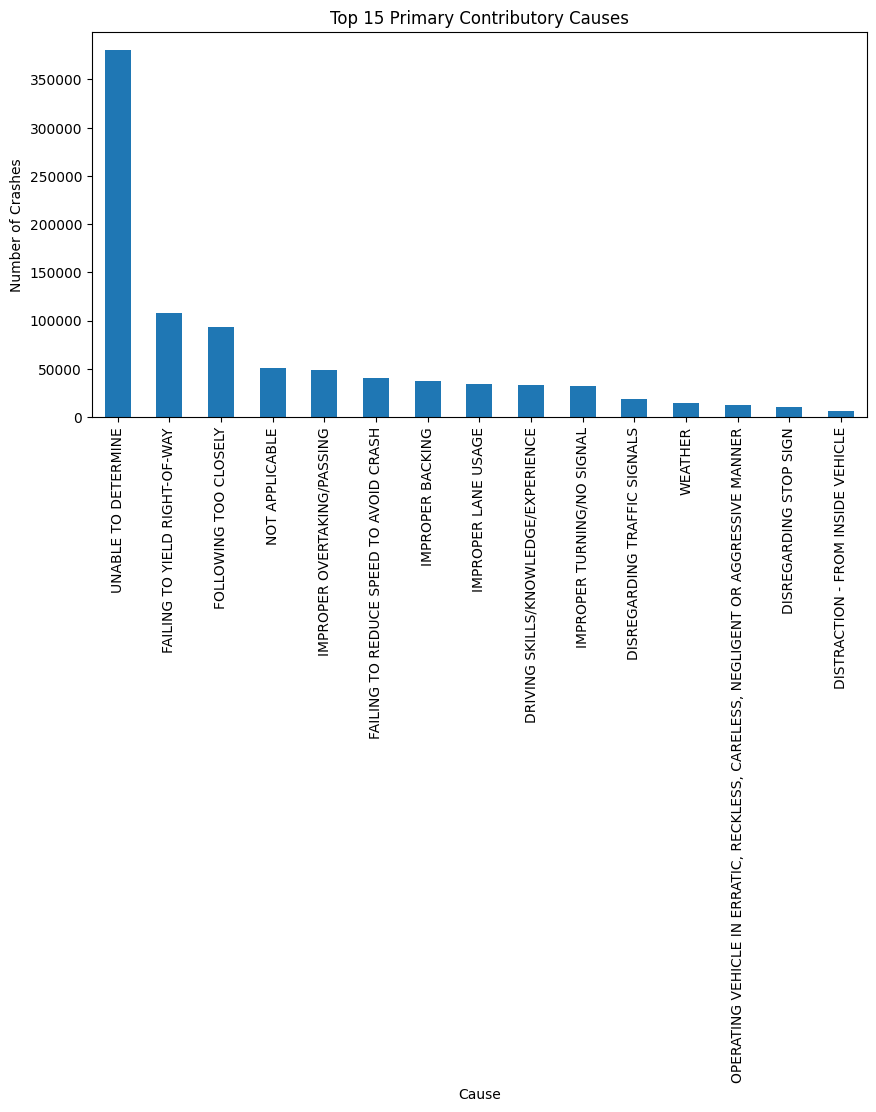

In [ ]:
# top primary contributory causes
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts().head(15).plot.bar(figsize=(10, 5), xlabel='Cause', ylabel='Number of Crashes', title='Top 15 Primary Contributory Causes')

<Axes: title={'center': 'Crashes by Hour'}, xlabel='Hour of Day', ylabel='Number of Crashes'>

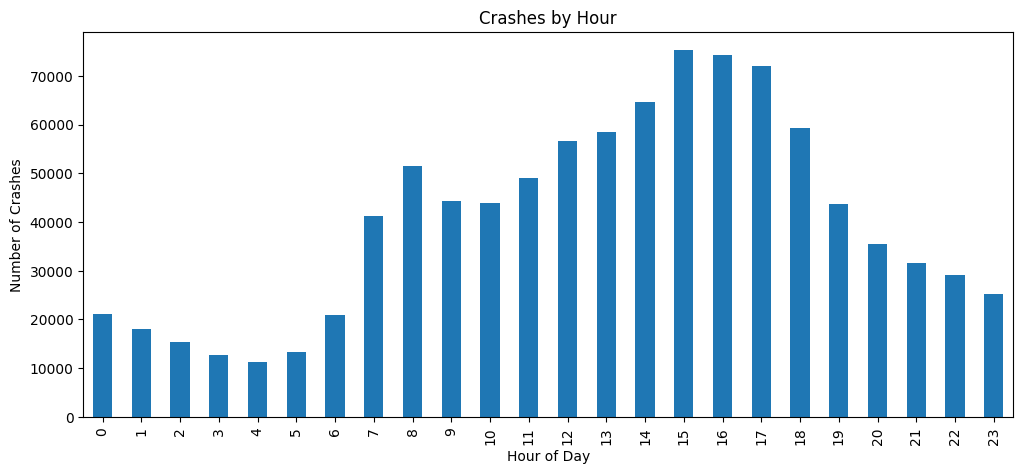

In [ ]:
# crash hour distribution
df['CRASH_HOUR'].value_counts().sort_index().plot.bar(figsize=(12, 5), xlabel='Hour of Day', ylabel='Number of Crashes', title='Crashes by Hour')

<Axes: title={'center': 'Crashes by Day of the Week'}, xlabel='Day of the Week', ylabel='Number of Crashes'>

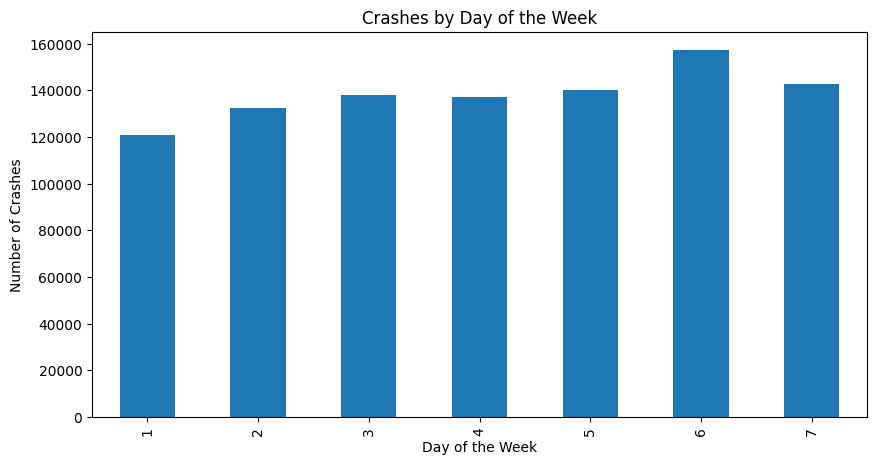

In [ ]:
# crash day distribution
df['CRASH_DAY_OF_WEEK'].value_counts().sort_index().plot.bar(figsize=(10, 5), xlabel='Day of the Week', ylabel='Number of Crashes', title='Crashes by Day of the Week')

# 4. **Data Science:**

MARKDOWN

Question:
Do the time and day of a crash affect how severe the crash is (in terms of injuries)?

I want to explore if certain hours of the day and days of the week are linked to higher injury count averages in traffic crashes. For example, are there more injuries during late-night weekend crashes compared to weekday mornings?


To answer this, I’ll use linear regression to model the relationship between:

Independent variables: CRASH_HOUR and CRASH_DAY_OF_WEEK

Dependent variable: INJURIES_TOTAL

I’ll first clean the data by dropping rows with missing values in these columns. Then I’ll train a linear regression model using sklearn. The model will help me predict the averages of injuries based on when the crash happened and let me see if certain times are more dangerous.


In [ ]:
from sklearn.linear_model import LinearRegression

df_cleaned = df.dropna(subset=["CRASH_HOUR", "CRASH_DAY_OF_WEEK", "INJURIES_TOTAL"])

ind = ["CRASH_HOUR", "CRASH_DAY_OF_WEEK"]
dep = "INJURIES_TOTAL"

model = LinearRegression()
model.fit(df_cleaned[ind], df_cleaned[dep])

df_cleaned["Predicted Injury"] = model.predict(df_cleaned[ind])
df_cleaned

df_cleaned.nlargest(25, "Predicted Injury")[["Predicted Injury", "INJURIES_TOTAL", "CRASH_HOUR", "CRASH_DAY_OF_WEEK"]]

#top25 = df_cleaned.nlargest(25, "Predicted Injury")
#top25[["INJURIES_TOTAL", "Predicted Injury"]].plot.bar(figsize = (12,6), xlabel = "Top 25 Crash Cases by Predicted Injury", ylabel = "Number of Injuries", title = "Predicted vs Actual Injuries for Top 25 Crashes")


/tmp/ipython-input-34-4083207962.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Predicted Injury"] = model.predict(df_cleaned[ind])


,Predicted Injury,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK
6,0.204589,0.0,23,1
625,0.204589,3.0,23,1
1046,0.204589,0.0,23,1
1951,0.204589,0.0,23,1
2018,0.204589,0.0,23,1
2158,0.204589,0.0,23,1
2163,0.204589,0.0,23,1
2231,0.204589,0.0,23,1
2651,0.204589,0.0,23,1
2669,0.204589,0.0,23,1


<Axes: title={'center': 'Average Injuries by Crash Hour"'}, xlabel='Crash Hour', ylabel='Average Injuries'>

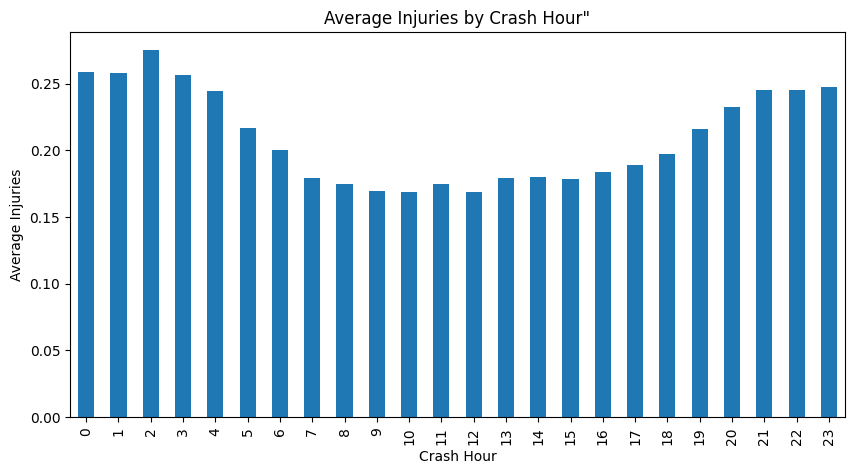

In [ ]:
df.groupby('CRASH_HOUR')['INJURIES_TOTAL'].mean().plot.bar(
    title='Average Injuries by Crash Hour"',
    ylabel='Average Injuries',
    xlabel='Crash Hour',
    figsize=(10, 5),
)

## 5. SUMMARY BIG PARAGRAPH



For this project, I analyzed traffic crash data from the City of Chicago to explore patterns in how and when crashes occur. My goal was to break down the data by key factors like street types, crash causes, road conditions, and timing. I conducted an exploratory data analysis (EDA) to identify trends in speed limits, traffic controls, crash types, and environmental conditions. For example, most crashes occurred on roads with no traffic control or at intersections with traffic signals or stop signs. Streets like Western Ave and Pulaski Rd had the highest number of crashes, while Dan Ryan Express and Lower Hubbard St had the highest average injuries. Crashes commonly happened during daylight and on dry roads, but fog, rain, and snow were linked to higher average injury counts. Most damage came from rear-end or parked vehicle collisions, and causes like "failure to yield" and "following too closely" were common.

In the visualization stage, I created several bar graphs to display these findings more clearly. I visualized trends such as which trafficway types were most crash-prone, how lighting and weather conditions affected crash frequency, and which crash causes resulted in the most injuries. For the data science portion, I asked whether the time and day of a crash could predict the number of injuries. Using linear regression in sklearn, I modeled injuries based on crash hour and day of the week. The model’s predicted injury values were fairly low (ranging from 0.18 to 0.2), which is expected given that most crashes don’t involve major injuries. The lowest predicted injury values occurred around midnight on Sundays, and the highest around 11 PM on Mondays. This project helped me combine real-world data analysis with machine learning to better understand urban traffic safety.